(c) Kirill Eremenko, www.superdatascience.com

The movie reviews website was very happy with your deliverable for the previous assignment and now they have a new request for you.<br>
The previous consultant had created the below chart for them. However the Python code used to create the diagram has
since been lost and cannot be recovered.<br>
The task is to come up with the code that will re-create the same chart making it look as close as possible
to the original.

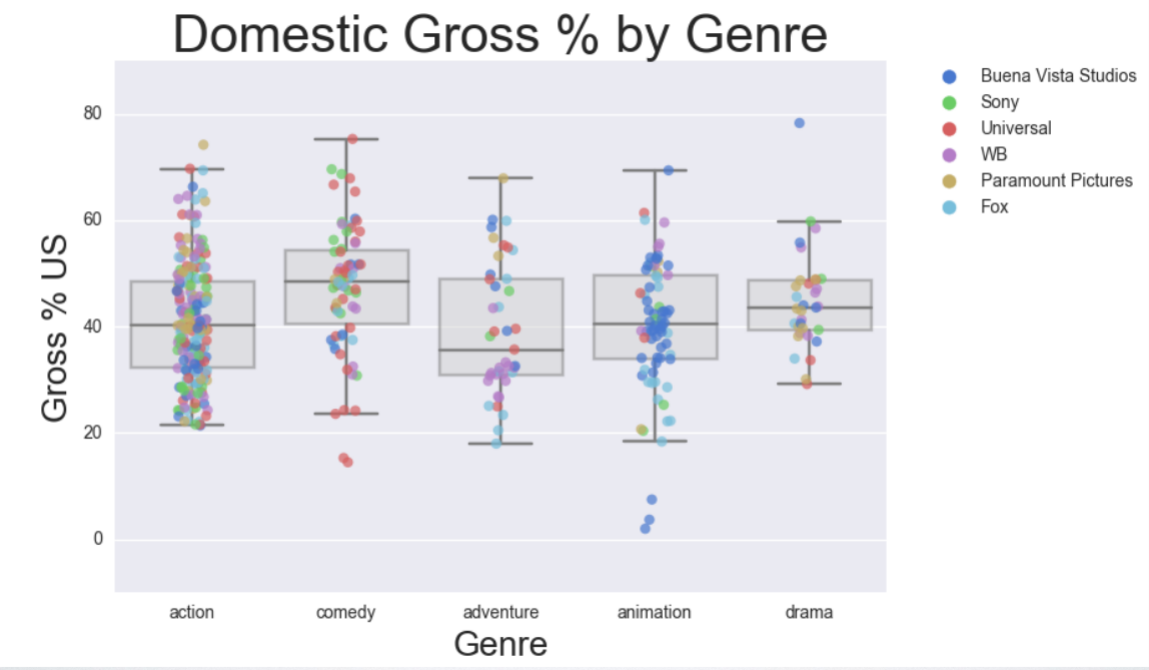

## Getting things ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('../Data/Movies-Exercise-Data.csv')

In [3]:
#create a copy and work on the copy without modifying the original dataset
movies_df = movies.copy()

## Data Preparation
### Data exploration

In [4]:
movies_df.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [6]:
movies_df.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


### Data Preparation

In [7]:
# Rename the columns
movies_df.columns = ['DayOfWeek', 'Director', 'Genre', 'Title', 'ReleaseDate', 'Studio', 'AdjustedGrossMillons', \
                  'BudgetMillions', 'GrossMillions', 'IMDbRating', 'MovieLensRating', 'OverseasMillions', 'OverseasPerc', \
                  'ProfitMillions', 'ProfitPerc', 'RuntimeMins', 'USMillions', 'GrossPercUS']

In [8]:
# Get the top 5 Genres by Gross % in US
top_genres = movies_df.groupby(by = 'Genre')['GrossPercUS'].sum().sort_values(ascending = False).head(5).index.to_list()
top_genres

['action', 'comedy', 'animation', 'drama', 'adventure']

In [9]:
# Get the top 6 Studios by Gross % in US
top_studios = movies_df.groupby(by = 'Studio')['GrossPercUS'].sum().sort_values(ascending = False).head(6).index.to_list()
top_studios

['WB', 'Buena Vista Studios', 'Universal', 'Fox', 'Paramount Pictures', 'Sony']

In [10]:
# Filter for Genres
filter_genre = movies_df.Genre.isin(top_genres)
filter_genre

0       True
1       True
2       True
3       True
4       True
       ...  
603    False
604     True
605    False
606     True
607     True
Name: Genre, Length: 608, dtype: bool

In [11]:
# Filter for Studios
filter_studio = movies_df.Studio.isin(top_studios)
filter_studio

0       True
1       True
2      False
3       True
4       True
       ...  
603     True
604     True
605     True
606     True
607    False
Name: Studio, Length: 608, dtype: bool

In [12]:
# Filtered dataset with both Genres and Studios filters
movies_df_top = movies_df[(filter_genre) & (filter_studio)]
movies_df_top

,DayOfWeek,Director,Genre,Title,ReleaseDate,Studio,AdjustedGrossMillons,BudgetMillions,GrossMillions,IMDbRating,MovieLensRating,OverseasMillions,OverseasPerc,ProfitMillions,ProfitPerc,RuntimeMins,USMillions,GrossPercUS
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Friday,Steven Spielberg,adventure,Jurassic Park,11/06/1993,Universal,"1,693.80",63.0,"1,029.20",8.1,3.66,626.7,60.9,966.2,1533.7,127,402.5,39.1
600,Friday,Steven Spielberg,adventure,E.T.: The Extra-Terrestrial,11/06/1982,Universal,"1,953.90",10.5,792.9,7.9,3.76,357.8,45.1,782.4,7451.4,115,435.1,54.9
602,Tuesday,Richard Fleischer,adventure,Doctor Dolittle,19/12/1967,Fox,"2,096.80",70.5,294.5,5.3,3.01,150.3,51.0,224,317.7,152,144.2,49.0
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5


### Data Visualization

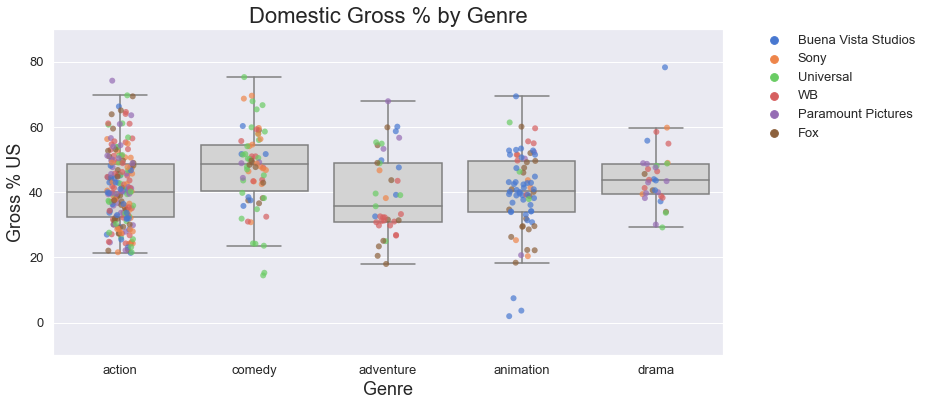

In [14]:
#Set style
sns.set(style = 'darkgrid', palette = 'muted', color_codes = True)
#Create a single subplot
f, axes = plt.subplots(squeeze = False)

#Create stripplot
sns.stripplot(data = movies_df_top, x = 'Genre', y = 'GrossPercUS', \
              hue = 'Studio', jitter = True, size = 6, linewidth = 0, alpha = 0.7, ax = axes[0, 0])

#Create boxplot
sns.boxplot(data = movies_df_top, x = 'Genre', y = 'GrossPercUS', \
            color = 'lightgrey', showfliers = False, ax = axes[0, 0])

#Set the plot title, xlabel, ylabel, ylim, fontsizes for title, xlabel, ylabel, xticks, yticks
plt.title('Domestic Gross % by Genre', fontsize = 22)
plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Gross % US', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(np.arange(0, 100, step = 20), fontsize = 13)
plt.ylim((-10, 90))

#Set transperancy
plt.setp(f.artists, alpha = 0.5)

#Styling legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad = 0., \
           facecolor = 'white',  edgecolor = 'white', fontsize = 13)